**I. Selección de las variables y justificación**

Se seleccionaron las variables:

- Ref. (Referencia del repuesto, categórica)

- Días desde la compra (numérica)

**Justificación:**
El objetivo es analizar cómo varía el tiempo en que ocurren las fallas según el repuesto. Esto permite identificar si ciertos repuestos tienden a fallar antes o después en la vida útil de la máquina, lo que resulta útil para planificación de inventario y mantenimiento preventivo.



=== Dataset original ===
Filas: 8747
Columnas: 21

=== Dataset filtrado (en garantía) ===
Filas: 7244
Columnas: 6

Top repuestos con más fallas en garantía:
             Ref.  Cantidad
188       FK-1152      2033
194       FK-3302      1797
124       DK-3192       635
121       DK-1150       198
191       FK-3202       160
49     302TA18840       135
127       DK-5140       130
104    303R402060       128
103    303R402033       127
7    302LV11770-G        99


/tmp/ipython-input-1390741845.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors="coerce")
/tmp/ipython-input-1390741845.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors="coerce")
/tmp/ipython-input-1390741845.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

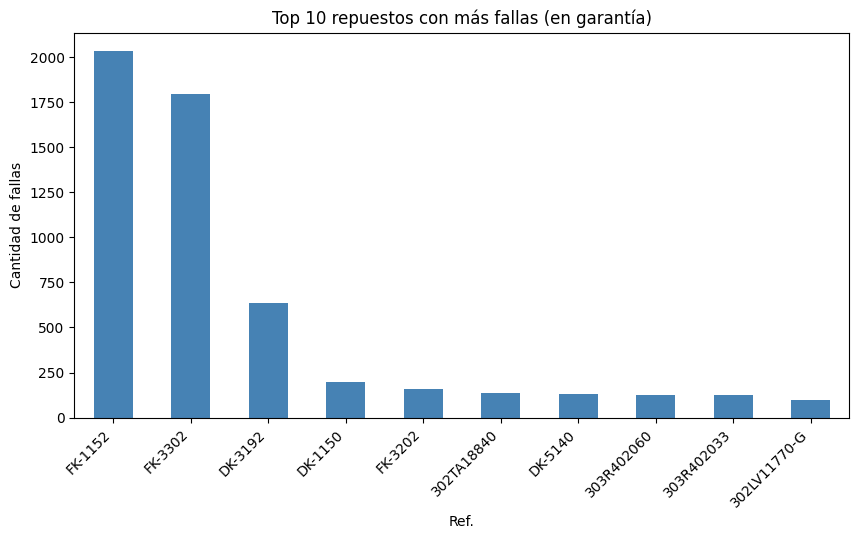

Número total de registros: 8747
Número de referencias únicas: 256
Referencia más frecuente: FK-1152
Número de fallas de la más frecuente: 2574

Percentiles de frecuencia de fallas:
count     256.000000
mean       34.125000
std       213.433684
min         1.000000
25%         1.000000
50%         2.000000
75%         9.000000
max      2574.000000
Name: count, dtype: float64


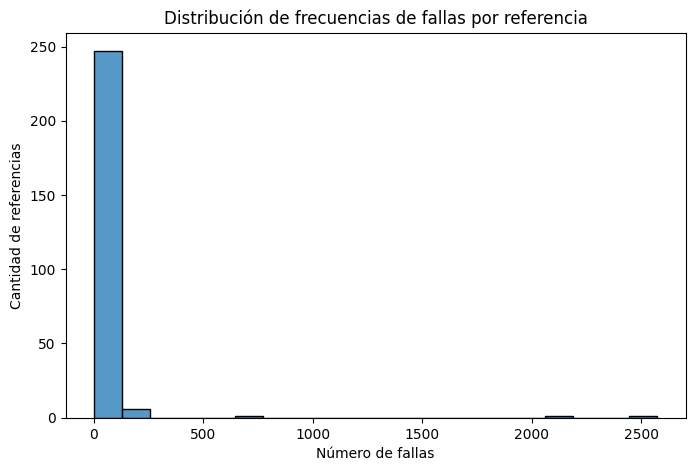

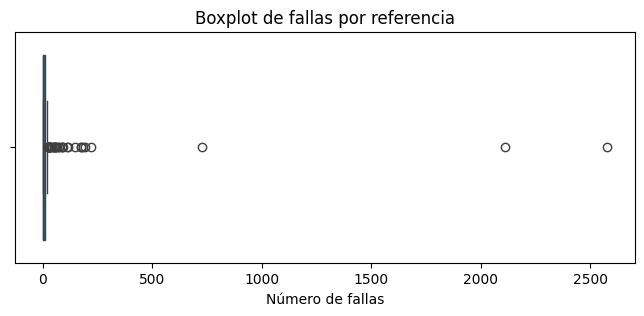


Top modelos con más fallas en garantía:
           Modelo  Cantidad
5   FS-M2640IDW/L      2002
7     FS-M3655IDN      1992
26     FS-P3155DN       911
16   FS-M6235CIDN       397
10    FS-M3860idn       260
1    FS-M2040DN/L       253
6     FS-M3145IDN       207
44      MA5500IFX       122
35    FS-P6235CDN       103
20     FS-P2040DW       102


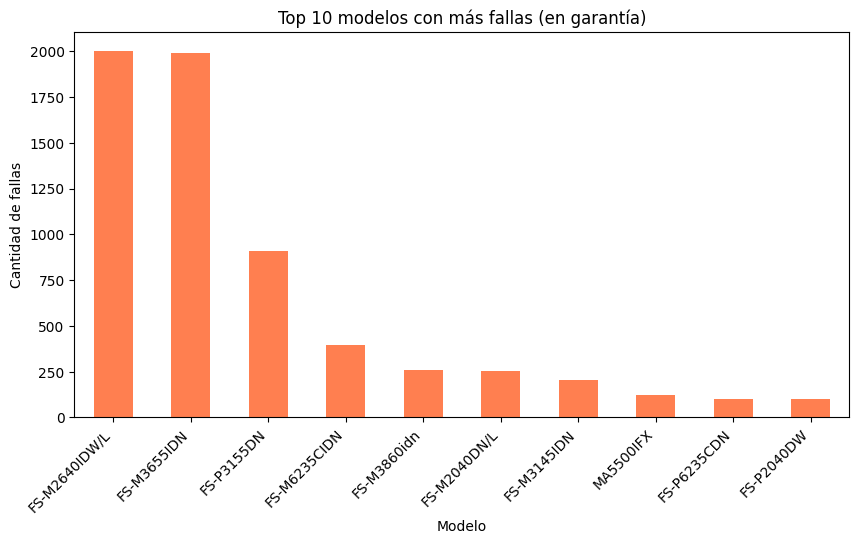

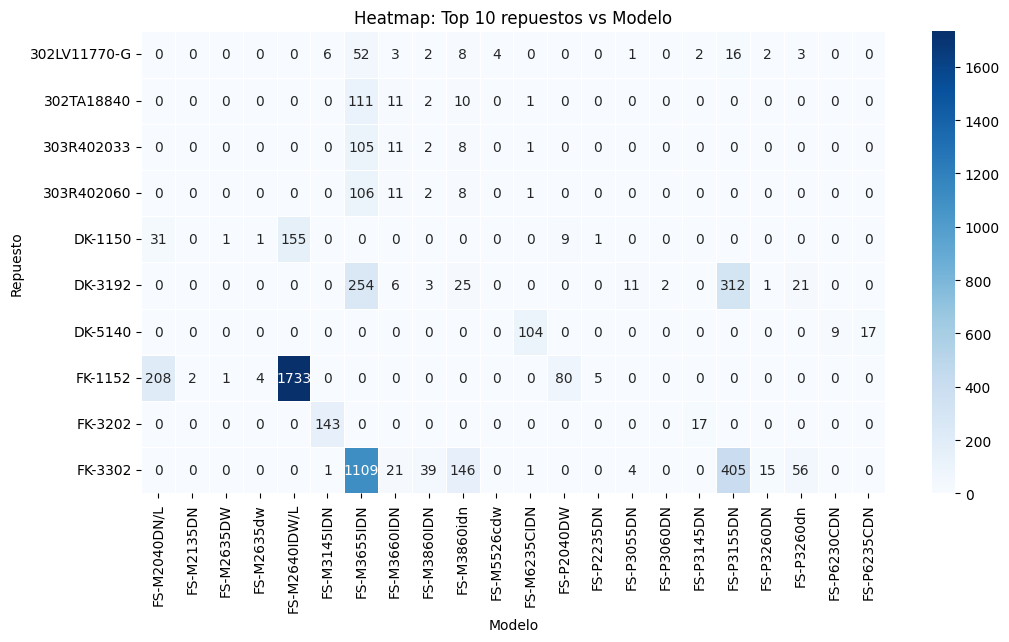

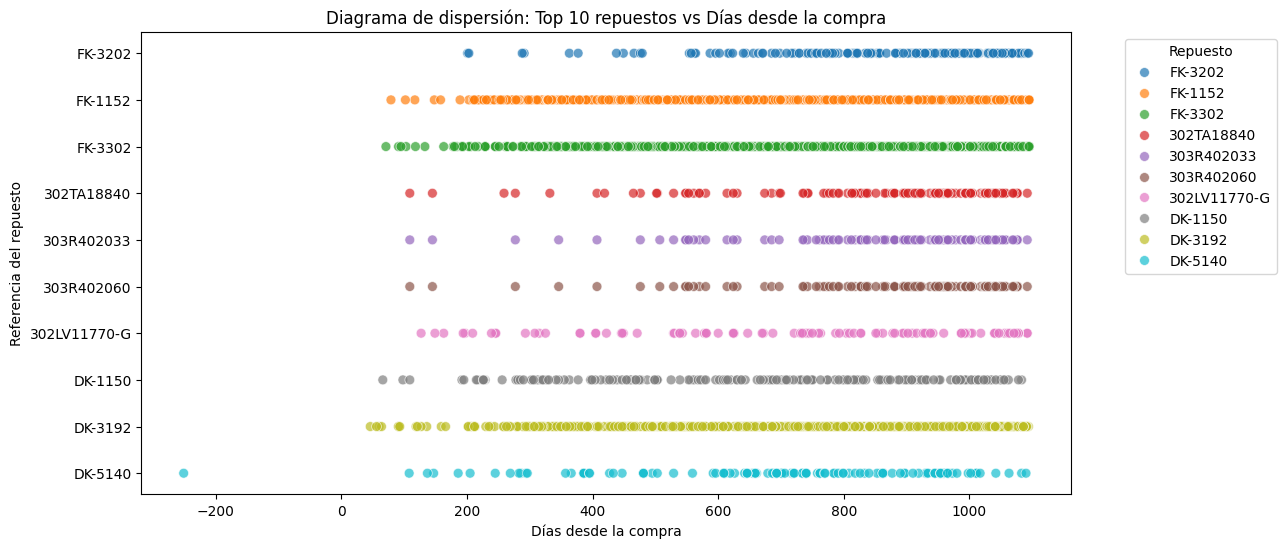

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

#from google.colab import files
#uploaded = files.upload()

# Cargamos el archivo
df_original = pd.read_excel("Datos_garantías.xlsx")

print("=== Dataset original ===")
print(f"Filas: {df_original.shape[0]}")
print(f"Columnas: {df_original.shape[1]}")

# Limpiamos nombres de columnas
df_original.columns = df_original.columns.str.strip().str.replace(r"\s+", " ", regex=True)

# Seleccionamos columnas necesarias
columnas_necesarias = [
    "Ref.",
    "Modelo",
    "Serie Maquina",
    "Fecha del Servicio (Paginas finales)",
    "Fecha Compra",
]
df = df_original[columnas_necesarias]

# Convertimos columnas de fecha
fechas = ["Fecha del Servicio (Paginas finales)", "Fecha Compra"]
for col in fechas:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Filtramos por garantía de 3 años
df["Dias desde compra"] = (df["Fecha del Servicio (Paginas finales)"] - df["Fecha Compra"]).dt.days
df_garantia = df[df["Dias desde compra"] <= 1095]

print("\n=== Dataset filtrado (en garantía) ===")
print(f"Filas: {df_garantia.shape[0]}")
print(f"Columnas: {df_garantia.shape[1]}")

#Análisis Univariado: Repuestos más frecuentes

# Top repuestos con más fallas
fallas_repuestos = (
    df_garantia.groupby("Ref.")
    .size()
    .reset_index(name="Cantidad")
    .sort_values("Cantidad", ascending=False)
)

print("\nTop repuestos con más fallas en garantía:")
print(fallas_repuestos.head(10))

# Visualización: Top 10 repuestos
top10 = fallas_repuestos.head(10).set_index("Ref.")
plt.figure(figsize=(10,5))
top10["Cantidad"].plot(kind="bar", color="steelblue")
plt.title("Top 10 repuestos con más fallas (en garantía)")
plt.ylabel("Cantidad de fallas")
plt.xticks(rotation=45, ha="right")
plt.show()

#Estadísticas descriptivas de repuestos

conteo_ref = df["Ref."].value_counts()
print("Número total de registros:", len(df))
print("Número de referencias únicas:", df["Ref."].nunique())
print("Referencia más frecuente:", conteo_ref.idxmax())
print("Número de fallas de la más frecuente:", conteo_ref.max())

print("\nPercentiles de frecuencia de fallas:")
print(conteo_ref.describe())

plt.figure(figsize=(8,5))
sns.histplot(conteo_ref, bins=20, kde=False)
plt.title("Distribución de frecuencias de fallas por referencia")
plt.xlabel("Número de fallas")
plt.ylabel("Cantidad de referencias")
plt.show()

plt.figure(figsize=(8,3))
sns.boxplot(x=conteo_ref)
plt.title("Boxplot de fallas por referencia")
plt.xlabel("Número de fallas")
plt.show()

#Análisis Bivariado

# 5.1 Bivariado: Cantidad de fallas por Modelo
fallas_modelo = (
    df_garantia.groupby("Modelo")
    .size()
    .reset_index(name="Cantidad")
    .sort_values("Cantidad", ascending=False)
)

print("\nTop modelos con más fallas en garantía:")
print(fallas_modelo.head(10))

top_modelos = fallas_modelo.head(10).set_index("Modelo")
plt.figure(figsize=(10,5))
top_modelos["Cantidad"].plot(kind="bar", color="coral")
plt.title("Top 10 modelos con más fallas (en garantía)")
plt.ylabel("Cantidad de fallas")
plt.xticks(rotation=45, ha="right")
plt.show()

#Bivariado: Repuestos vs Modelo (Heatmap)

#Top 10 repuestos más frecuentes
top10_repuestos = df_garantia['Ref.'].value_counts().head(10).index.tolist()

#Filtramos nuestro dataset para estos repuestos
df_heatmap = df_garantia[df_garantia["Ref."].isin(top10_repuestos)]

#Creamos la tabla cruzada (repuestos vs modelos)
tabla_heatmap = pd.crosstab(df_heatmap["Ref."], df_heatmap["Modelo"])

#Graficamos el heatmap
plt.figure(figsize=(12,6))
sns.heatmap(tabla_heatmap, cmap="Blues", linewidths=0.5, annot=True, fmt="d")
plt.title("Heatmap: Top 10 repuestos vs Modelo")
plt.ylabel("Repuesto")
plt.xlabel("Modelo")
plt.show()


#Top 10 repuestos más frecuentes
top10 = df_garantia['Ref.'].value_counts().head(10).index
df_top10 = df_garantia[df_garantia['Ref.'].isin(top10)]

#Scatterplot
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_top10,
    x="Dias desde compra",
    y="Ref.",
    hue="Ref.",   # cada repuesto con un color
    palette="tab10",
    alpha=0.7,
    s=50
)

plt.title("Diagrama de dispersión: Top 10 repuestos vs Días desde la compra")
plt.xlabel("Días desde la compra")
plt.ylabel("Referencia del repuesto")
plt.legend(title="Repuesto", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()




**II. Interpretación de los resultados**

Estadísticas descriptivas: nos encontramos que estamos analizando 256 referencia diferentes, se tiene que en promedio, cada referencia falla 34 veces, la desviación estandar es muy alta, esto significa que la distribución está muy desigual (pocos repuestos fallan mucho, y la mayoría falla muy poco).hay referencias nque fallaron solo 1 vez, el 25% de los repuestos fallan 2 veces o menos, la mitad de los repuestos fallan 9 veces o menos, el 75% fallan 20 veces o menos, y la referencia con mas fallas llegó a 2574 fallas.

Diagrama de dispersión: evidencia la distribución temporal de fallas, mostrando repuestos que fallan a lo largo de todo el rango de garantía (por ejemplo, el FK-1152, FK-3302), frente a otros que tienen fallas más concentradas en ciertos periodos.

Boxplot: la mayoría de las referencia tiene muy poco fallas (menos de 20 en la gran mayoria de los casos), esto concuerda con la mediana y el percentil.

hay pocos outliers a la derecha, lo cual representa que hay referencias con un numero de fallas mayor al promedio.

hay una concentración extrema de valores pequeños y unos pocos valores muy grandes.

**III. Conclusión:**

- Algunos modelos concentran más fallas que otros, por lo que podrían requerir mayor atención en mantenimiento.  

- Determinados repuestos (FK-1152,FK-3302,DK-3192) presentan fallas frecuentes, especialmente en ciertos modelos, lo que permite priorizar inventario.  
La mayoría de las fallas ocurren dentro de los primeros días después de la compra; pocas alcanzan el límite de 3 años.

- Estos hallazgos permiten planificar estrategias de mantenimiento preventivo y optimizar la gestión de repuestos críticos.  

- Próximos pasos: analizar causas de fallas, explorar patrones multivariados y consider
